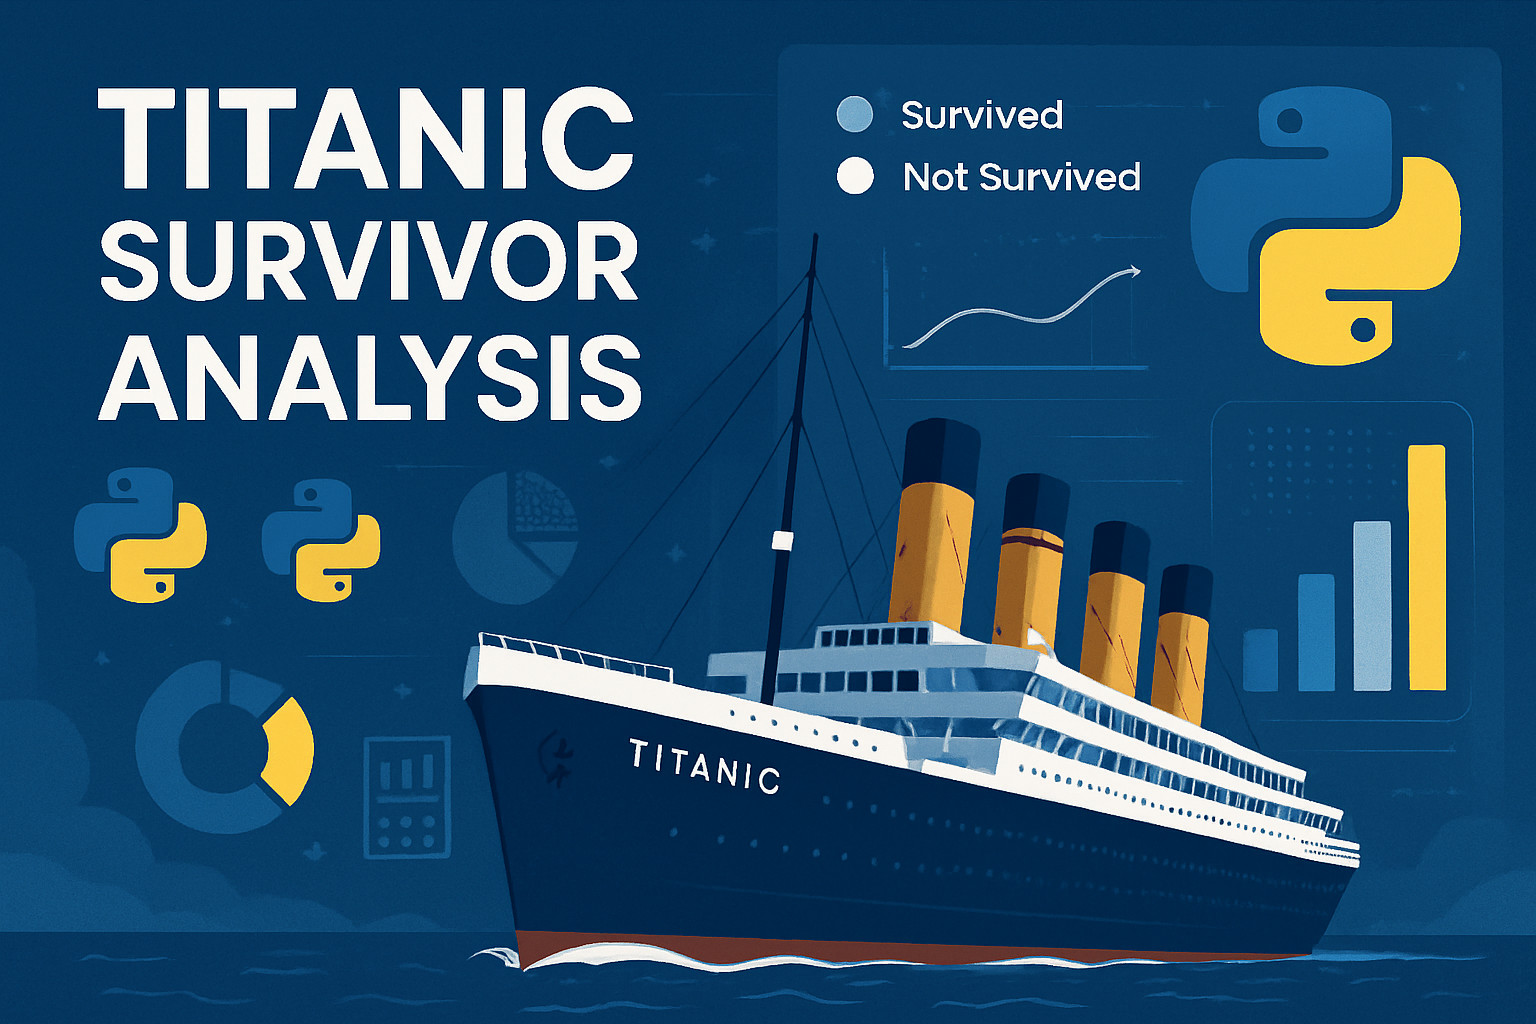

## Description:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.
Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


## Column Description

* survival-	Survival	0 = No, 1 = Yes
* pclass-	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex-	Sex
* Age-	Age in years
* sibsp# No of siblings/spouses aboard the Titanic
* parch# No of parents / children aboard the Titanic
* ticket-	Ticket number
* fare-	Passenger fare
* cabin-	Cabin number
* embarked-	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Acknowledgements:

This dataset has been referred from Kaggle:
https://www.kaggle.com/c/titanic/data.

In [69]:
# Import the Dataset
# Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
df = pd.read_csv("/content/sample_data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.shape

(891, 12)

In [72]:
df.size

10692

In [73]:
df.ndim

2

In [74]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [75]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df.describe(include ='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


##  Pull all the unique values within all columns

In [79]:
df['Pclass'].unique()

array([3, 1, 2])

In [80]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [81]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [82]:
df["Survived"].unique()

array([0, 1])

In [83]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

# Check Duplicates within the dataset

In [84]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [85]:
df.duplicated().sum()

np.int64(0)

# Check for Missing, Null values

In [86]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [88]:
## "Remove the 'cabin' column since it contains the highest number of missing values"

df = df.drop(['Cabin'], axis = 1)

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [90]:
# "Proceed to handle the Age column, as there are 177 missing values present"

age_avg= df.Age.mean()  # finding the mean of age column
print(age_avg)

29.69911764705882


In [91]:
# Replace the missing values with the mean value of the column.

df["Age"].replace(np.nan,age_avg,inplace=True)

In [92]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [93]:
# for categorical Column(String Data)-> mode/frequency

fiq = df.Embarked.dropna().mode()[0]

In [94]:
print(fiq)

S


In [95]:
df.Embarked.replace(np.nan, fiq, inplace = True)

In [96]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


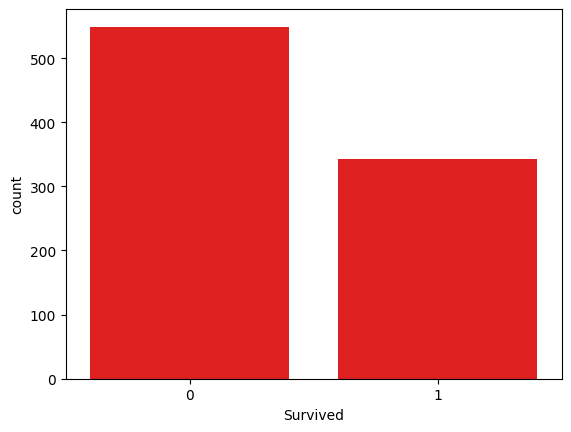

In [97]:
# Plot the Survived and Dead

plt.figure(dpi = 100)
sns.countplot(x='Survived', data = df, color = 'red')
plt.show()

In [98]:
# Get the total counts of Survivors and Dead

df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Sex', ylabel='count'>

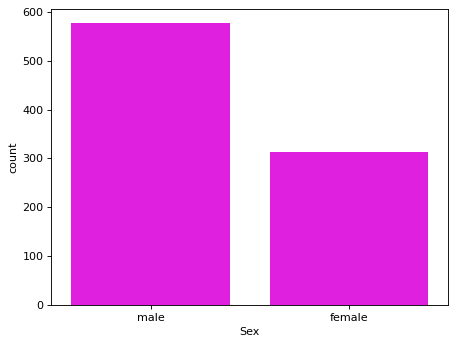

In [99]:
#  Get the male female survivors counts

plt.figure(dpi =80)
sns.countplot(x='Sex', data = df, color = "magenta")

<Axes: xlabel='Survived', ylabel='count'>

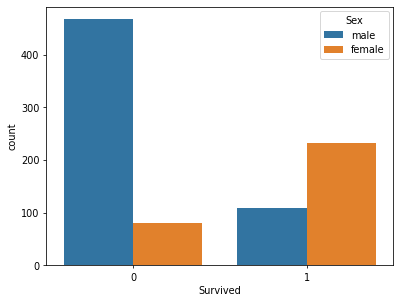

In [100]:
# Get the male females survivors ratio

plt.figure(dpi = 70)
sns.countplot(x='Survived', hue = 'Sex', data = df)

In [101]:
# Get the total count of survived male.

men_survival = df[df.Sex == 'male']['Survived'].count()
print(men_survival)

577


In [102]:
# Get the survival rate for male

men_survival = df [ df.Sex == 'male']['Survived']

men_survival_rate = sum(men_survival) / len (men_survival)*100

In [103]:
print(sum(men_survival))

109


In [104]:
print(men_survival)

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64


In [105]:
print(men_survival_rate)

18.890814558058924


In [106]:
# Total number of male survived using method 1

df[(df.Sex == 'male') & (df.Survived == 1)].count()

,0
PassengerId,109
Survived,109
Pclass,109
Name,109
Sex,109
Age,109
SibSp,109
Parch,109
Ticket,109
Fare,109


In [107]:
# Method 2

len(df[(df.Sex == 'male') & (df.Survived == 1)])

109

In [108]:
# Get the female survivor rate

female_survival= df [df.Sex=="female"]["Survived"] #males are excluded
female_survival_rate=sum(female_survival)/len(female_survival)*100

In [109]:
print(sum(female_survival))

233


In [110]:
print(female_survival)

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64


In [111]:
print(female_survival_rate)

74.20382165605095


Female survivor's rate is greater then male.

In [112]:
res= df.groupby("Sex")["Survived"].value_counts()
print(res)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [113]:
# give the percentage of survival

res= df .groupby("Sex")["Survived"].value_counts(normalize=True)
print(res)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [114]:
#female survived
print("percentage of Women survived",res[0]*100)

percentage of Women survived 74.20382165605095


In [115]:
# female Not Survived

print("percentage of Women not survived",res[1]*100)

percentage of Women not survived 25.796178343949045


In [116]:
#Male Survived

print("percentage of Men survived",res[2]*100)

percentage of Men survived 81.10918544194108


In [117]:
#male not survived

print("percentage of Men not survived",res[3]*100)

percentage of Men not survived 18.890814558058924


# Survival Rate Based on Passanger Class

<Axes: xlabel='Survived', ylabel='count'>

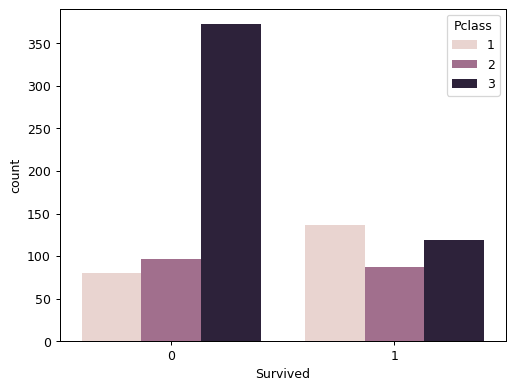

In [118]:
# Survived Vs Pclass

plt.figure(dpi = 90)
sns.countplot(x='Survived', hue = 'Pclass', data = df)

In [119]:
res1 = df.groupby('Pclass')['Survived'].value_counts(normalize = True)
print(res1)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [120]:
res1 = df.groupby('Pclass')['Survived'].value_counts()

In [121]:
print(res1)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


In [122]:
print("percentage Not survival of class1",res1[1][0]*100)

percentage Not survival of class1 8000


In [123]:
print("percentage survival of class1",res1[1][1]*100)

percentage survival of class1 13600


In [124]:
print("percentage Not survival of class2",res1[2][0]*100)
print("percentage survival of class2",res1[2][1]*100)

percentage Not survival of class2 9700
percentage survival of class2 8700


In [125]:
print("percentage Not survival of class3",res1[3][0]*100)
print("percentage survival of class3",res1[3][1]*100)

percentage Not survival of class3 37200
percentage survival of class3 11900


# Survivor rate from Pclass == 1

In [126]:
#total people with Pclass 1 that are in survived cloumn

total_survived=df[df.Pclass==1]["Survived"]

In [127]:
#percentage of total survival rate, those who are survived from pclass 1

total_survival_rate=sum(total_survived)/len(total_survived)*100

In [128]:
#len of Pclass 1
print(len(total_survived))

216


In [129]:
#sum of total survival people
print(sum(total_survived))

136


In [130]:
#percentage of all survived people from Pclass 1
print(total_survival_rate)

62.96296296296296


# Survivor Rate from Pclass == 2

In [131]:
total_survived = df[df.Pclass==2]["Survived"]

total_survival_rate = sum(total_survived)/len(total_survived)*100

print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

184
87
47.28260869565217


# Survivor Rate from Pclass == 3

In [132]:
total_survived = df[df.Pclass==3]["Survived"]

total_survival_rate = sum(total_survived)/len(total_survived)*100

print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

491
119
24.236252545824847


# Survival Based on Embarked

<Axes: xlabel='Survived', ylabel='count'>

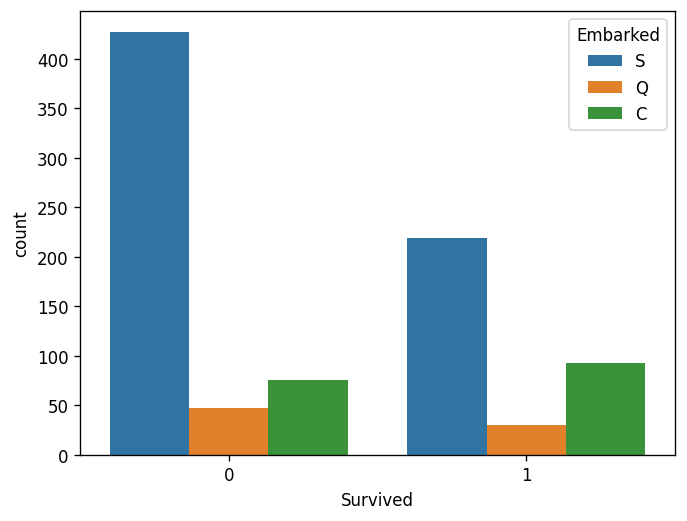

In [133]:
plt.figure(dpi=120)
sns.countplot(x="Survived", hue="Embarked", data = df)

In [134]:
df["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


# Embarked == "S"

In [136]:
total_survived = df[df.Embarked=="S"]["Survived"]

total_survival_rate=sum(total_survived)/len(total_survived)*100

print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

646
219
33.90092879256966


# Embarked == "C"

In [137]:
total_survived = df[df.Embarked=="C"]["Survived"]

total_survival_rate=sum(total_survived)/len(total_survived)*100


print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

168
93
55.35714285714286


# Embarked == "Q"

In [138]:
total_survived = df[df.Embarked=="Q"]["Survived"]

total_survival_rate=sum(total_survived)/len(total_survived)*100


print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

77
30
38.961038961038966


In [139]:
res2 = df.groupby('Embarked')['Survived'].value_counts()

In [141]:
(res2)

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

In [143]:
res2 = df.groupby('Embarked')['Survived'].count()
res2

,Survived
Embarked,
C,168
Q,77
S,646


In [144]:
res2 = df.groupby('Embarked')['Survived'].value_counts(normalize = True)
print(res2)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: proportion, dtype: float64


# Survival Based on SibSp

<Axes: xlabel='Survived', ylabel='count'>

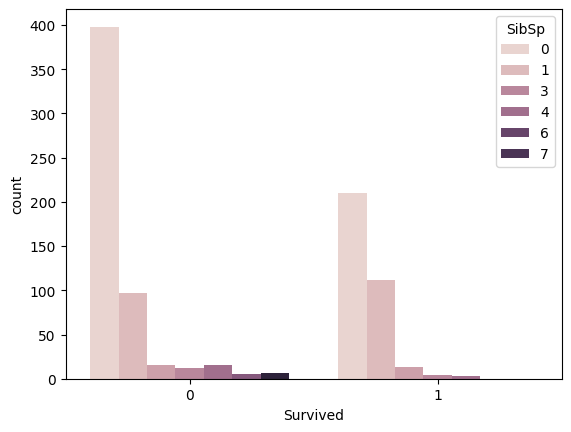

In [145]:
plt.figure(dpi=100)
sns.countplot(x="Survived",hue="SibSp",data = df)

In [146]:
res3 = df.groupby("SibSp")['Survived'].value_counts()
print(res3)

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64


In [147]:
res3 = df.groupby("SibSp")['Survived'].value_counts(normalize = True)

print(res3)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: proportion, dtype: float64


# Survival Based on Fare

<Axes: xlabel='Survived', ylabel='count'>

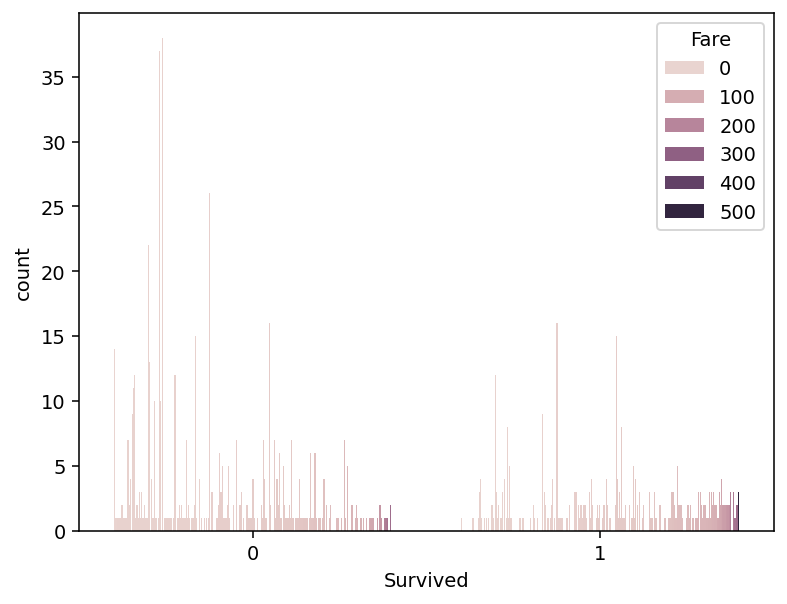

In [149]:
plt.figure(dpi=140)
sns.countplot(x = "Survived",hue = "Fare",data = df)

<Axes: xlabel='Survived', ylabel='Fare'>

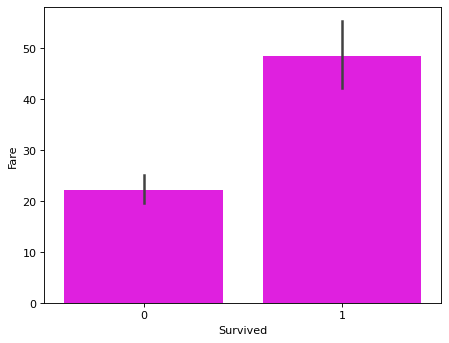

In [151]:
plt.figure(dpi = 80)
sns.barplot(x = 'Survived', y = 'Fare', data = df, color = 'magenta')

<Axes: xlabel='Survived', ylabel='Fare'>

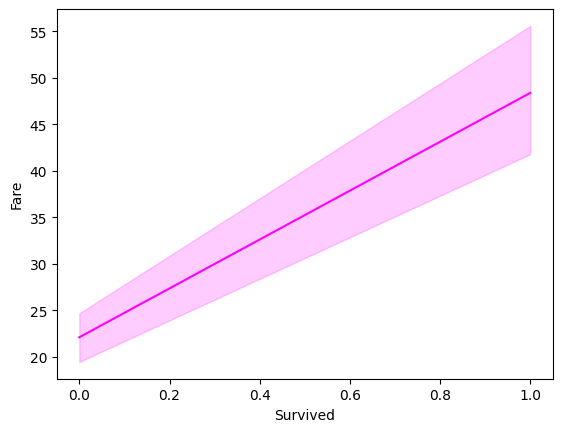

In [152]:
plt.figure(dpi = 100)
sns.lineplot(x = 'Survived', y = 'Fare', data = df, color = 'magenta')

<Axes: xlabel='Fare'>

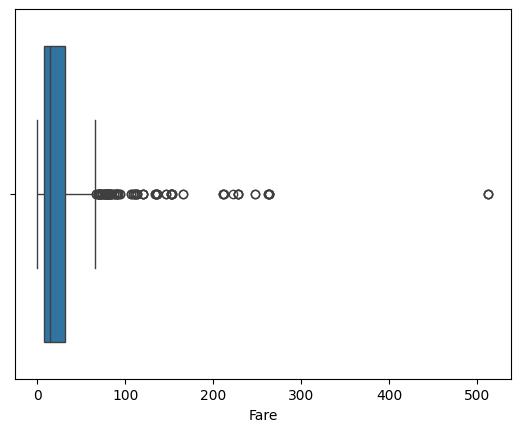

In [154]:
plt.figure(dpi=100)
sns.boxplot(x="Fare",data = df)

# Survived vs Age

<Axes: xlabel='Age'>

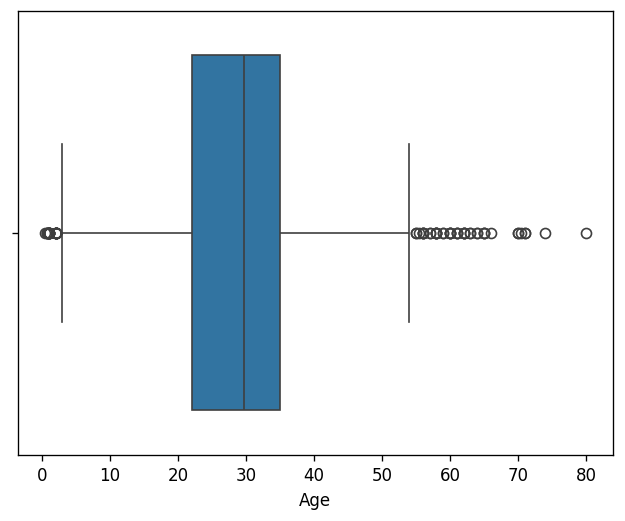

In [156]:
plt.figure(dpi=120)
sns.boxplot(x="Age",data= df)

<Axes: xlabel='Age'>

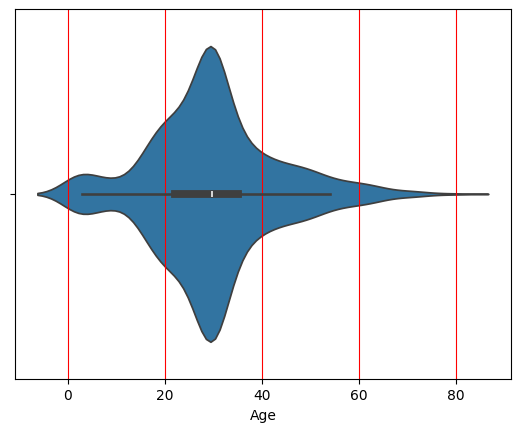

In [157]:
plt.figure(dpi=100)
plt.grid(color="red")
sns.violinplot(x="Age",data = df)

In [159]:
# Get the age Quantile (0.25, 0.50, 0.75)

df.Age.quantile(0.25)

np.float64(22.0)

In [160]:
df.Age.quantile(0.50)

np.float64(29.69911764705882)

In [161]:
df.Age.quantile(0.75)

np.float64(35.0)

In [162]:
df.groupby(["Sex","Survived"])["Age"].mean()

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64